# Project: Chinook_music_store_SQL_database_investigation.

## Database ERD


<p><img src="https://raw.githubusercontent.com/Muhammet-Abd-ElWahab/Chinook_Music_Store_SQL_Database_Investigation/main/ERD.png" alt="ERD"></p>

<a id='Quest'></a>
## **Questions:**


**1. Who is the best sales representative regarding total sales amount?**

**2. What is the country that has the highest total sales amount (TOP 5)?**

**3. Who is the Artist that has the most count of Sold tracks for each genre and their counts?**

**4. What is the media type that has the highest total sales amount?**



In [10]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Create engine

engine = create_engine("sqlite:///chinook.db")
con = engine.connect()

In [5]:
## Make query

query1 = """

SELECT 
    (emp.FirstName  || ' ' || emp.LastName )as Employee_Name,
     SUM( inv.total) as total_sales
FROM
    Customer as cst
JOIN
    Invoice as inv
ON
    cst.CustomerId = inv.CustomerId
JOIN
    Employee as emp
ON
    emp.EmployeeId = cst.SupportRepId
GROUP BY 1
ORDER BY 2 desc

"""

In [6]:
# Load data from database

df_1 = pd.read_sql(query1, engine)
df_1

,Employee_Name,total_sales
0,Jane Peacock,833.04
1,Margaret Park,775.40
2,Steve Johnson,720.16


<AxesSubplot:xlabel='Employee_Name', ylabel='total_sales'>

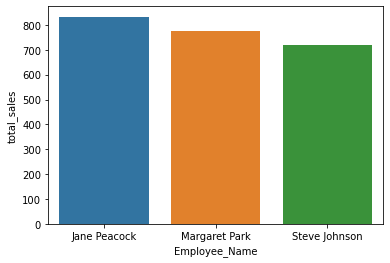

In [11]:
# Plot data

sns.barplot(x = "Employee_Name", y="total_sales",data=df_1);

### Question 1

**1. Who is the best sales representative regarding total sales amount?**


### Answer

**Jane Peacock is the best sales representative with total sales 833.04 USD**

In [12]:
## Make query

query2 = """

SELECT  
    cst.Country as country,
    SUM(inv.total) as total_sales
FROM
    Customer as cst
JOIN
    Invoice as inv
ON
    cst.CustomerId = inv.CustomerId
GROUP BY 1
ORDER BY 2 desc
LIMIT 5


"""

In [13]:
# Load data from database

df_2 = pd.read_sql(query2, engine)
df_2

,country,total_sales
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48


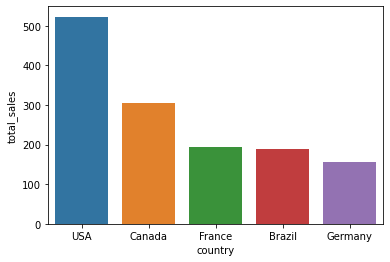

In [14]:
# Plot data

sns.barplot(x = "country", y="total_sales",data=df_2);

### Question 2

**2. What is the country that has the highest total sales amount (TOP 5)?**

### Answer

**USA is the country which has the highest total sales with 523.06 USD. Canada comes in the second place with 303.96 USD. France in the third place with 195.1 USD.**

In [15]:
## Make query

query3 = """

WITH t1 AS
  (SELECT 
      gen.Name AS genre_name,
      art.Name AS artist_name,
      COUNT(*) AS genre_count
   FROM
       Track AS tra
   JOIN
       Album AS alb ON alb.AlbumId = tra.AlbumId
   JOIN
       Artist AS art ON art.ArtistId = alb.AlbumId
   JOIN
       Genre AS gen ON gen.GenreId = tra.GenreId
   JOIN
       InvoiceLine AS invl ON invl.TrackId = tra.TrackId
   GROUP BY 1,
            2
   ORDER BY 3 DESC),
     t2 AS
  (SELECT
      t1.genre_name,
      MAX (t1.genre_count) AS genre_max
   FROM
       t1
   GROUP BY 1
   ORDER BY 2 DESC)
SELECT 
    (t1.artist_name || ' (' ||t1.genre_name|| ') ') AS genre_artist,
    t1.genre_count
FROM
    t1
JOIN
    t2 
ON
    t1.genre_name = t2.genre_name
AND t1.genre_count= t2.genre_max
LIMIT 10





"""

In [16]:
# Load data from database

df_3 = pd.read_sql(query3, engine)
df_3

,genre_artist,genre_count
0,Frank Zappa & Captain Beefheart (Latin),27
1,Barry Wordsworth & BBC Concert Orchestra (Alte...,22
2,Ed Motta (Rock),20
3,Calexico (Sci Fi & Fantasy),18
4,Queen (Jazz),17
5,Yehudi Menuhin (Pop),16
6,Vinícius De Moraes (Blues),15
7,Kiss (Bossa Nova),15
8,Cidade Negra (Metal),12
9,Lost (Metal),12


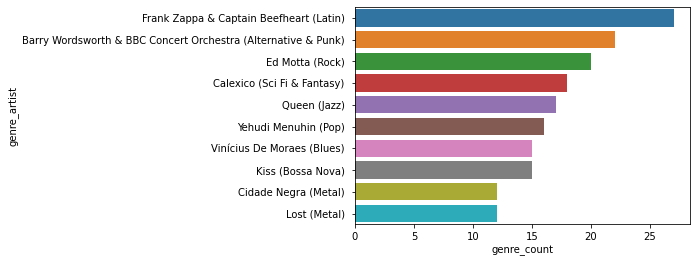

In [20]:
# Plot data

sns.barplot(y = "genre_artist", x="genre_count",data=df_3);

### Quetion 3


**3. Who is the Artist that has the most count of Sold tracks for each genre and their counts?**


### Answer 

**Frank Zappa & Captain Beefheart is the top artist that has most count of sold tracks with 27 track in (Latin) genre. Barry Wordsworth & BBC Concert Orchestra comes in second place with 22 track in (Alternative & Punk) genre. Ed Motta is the third top artist.**

In [21]:
## Make query

query4 = """

SELECT
    media.Name as media_type,
    SUM(invl.UnitPrice * invl.Quantity) total_sales
FROM
    Track as tra
JOIN
    InvoiceLine as invl
ON
    invl.TrackId = tra.TrackId
JOIN
    MediaType as media
ON
    media.MediaTypeId = tra.MediaTypeId
GROUP BY 1
ORDER BY 2 desc


"""

In [22]:
# Load data from database

df_4 = pd.read_sql(query4, engine)
df_4

,media_type,total_sales
0,MPEG audio file,1956.24
1,Protected MPEG-4 video file,220.89
2,Protected AAC audio file,144.54
3,Purchased AAC audio file,3.96
4,AAC audio file,2.97


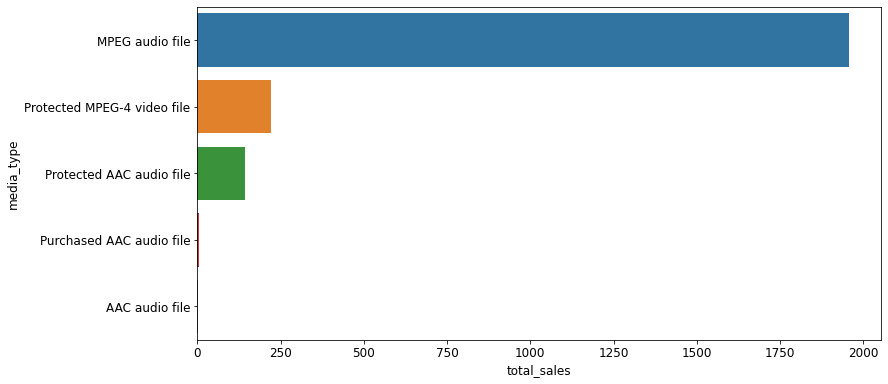

In [62]:
# Plot data

sns.barplot(y = "media_type", x="total_sales",data=df_4);

### Question 4


**4. What is the media type that has the highest total sales amount?**

### Answer 

**MPEG audio ﬁle media type has the highest total sales amount with 84 % percent from total sales.**


**AAC audio ﬁle and Purchased AAC audio ﬁle media types comes in the last place with 0% percent from total sales.**